## Generar una rosa de vientos de datos observados

1- Enlace para descargar cualquier estación:

ftp://ftp.ncdc.noaa.gov/pub/data/noaa

2- Descargar ishJava.java , ishJava.class

3- Navegar dentro de la dirección FTP anterior al año y descargar después los datos de la estación según su código que se puede obtener en el siguiente enlace:

http://weather.rap.ucar.edu/surface/stations.txt

4- Descargar los datos anuales de la estación:

5- En el directorio local donde están descargados los archivos Java ejecutar el siguiente comando:

java -classpath . ishJava file_to_convert file_out_converted

In [1]:
from ftplib import FTP

ftp = FTP('ftp.ncdc.noaa.gov')     # connect to host, default port
ftp.login()                     # user anonymous, passwd anonymous@

ftp.cwd('/pub/data/noaa')               # change into "debian" directory
# ftp.retrlines('LIST')           # list directory contents


#ftp.retrbinary('RETR README', open('README', 'wb').write)

#ftp.quit()

'250 CWD command successful'

In [2]:
year='2017'
station='855740'
filename = station+'-99999-'+year+'.gz'

ftp.cwd(year)
ftp.retrbinary('RETR %s'% filename, open(filename, 'wb').write)

ftp.quit()

'221 Goodbye.'

In [3]:
!ls $filename

855740-99999-2017.gz


In [4]:
!gunzip -f $filename
filename=station+'-99999-'+year
!java ishJava $filename $filename'.txt'
!ls $filename".txt"

855740-99999-2017.txt


In [5]:
#!/usr/local/bin/python3.7
from pandas import DataFrame, read_csv
import windrose as wr
from windrose import WindroseAxes
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

Leer los datos de entrada:

In [6]:
open_file = filename+'.txt'
#file = r 'filename'

print(open_file)
df = pd.read_csv(open_file, sep='\s+')
print(df.columns.values)

del open_file

855740-99999-2017.txt
['USAF' 'WBAN' 'YR--MODAHRMN' 'DIR' 'SPD' 'GUS' 'CLG' 'SKC' 'L' 'M' 'H'
 'VSB' 'MW' 'MW.1' 'MW.2' 'MW.3' 'AW' 'AW.1' 'AW.2' 'AW.3' 'W' 'TEMP'
 'DEWP' 'SLP' 'ALT' 'STP' 'MAX' 'MIN' 'PCP01' 'PCP06' 'PCP24' 'PCPXX' 'SD']


Seleccionar aquellas columnas con los valores de velocidad y dirección del viento:

In [7]:
ws_ini = df['SPD']
wd_ini = df['DIR']

Depurar los datos NAN y no numéricos contenidos:

In [8]:
#ws_int = list(map(int, ws_ini))
#wd_int = list(map(int, wd_ini))

ws_wo_na = ws_ini.dropna()
wd_wo_na = wd_ini.dropna()


pos_aste = wd_ini.str.contains("***", regex=False)

ws_wo_ast = []
wd_wo_ast = []

for i in  range(len(pos_aste.values)):
    if pos_aste.values[i]==False:
        ws_wo_ast.append(ws_wo_na[i])
        wd_wo_ast.append(wd_wo_na[i])


ws = list(map(int, ws_wo_ast))
wd = list(map(int, wd_wo_ast))
#print(ws)

numeric_types = [int, float, complex]

#test_clean = [x for x in test if type(x) in numeric_types]
ws_clean=[]
wd_clean=[]

#print(len(ws))
#print(len(wd))


for x,y in zip(ws, wd):
    y = wd[ws.index(x)]
    if type(x) in numeric_types and type(y) in numeric_types:
        if y!= 990:
            ws_clean.append(x)
            wd_clean.append(y)
            #print('bad value')

            #print('hi')

#wd_clean=wd_clean[0:len(wd_clean)-1]
#ws_clean=ws_clean[0:len(ws_clean)-1]

#print(wd_clean)
#print(ws_clean)

Graficar la rosa de vientos para un número de direcciones (nsector):

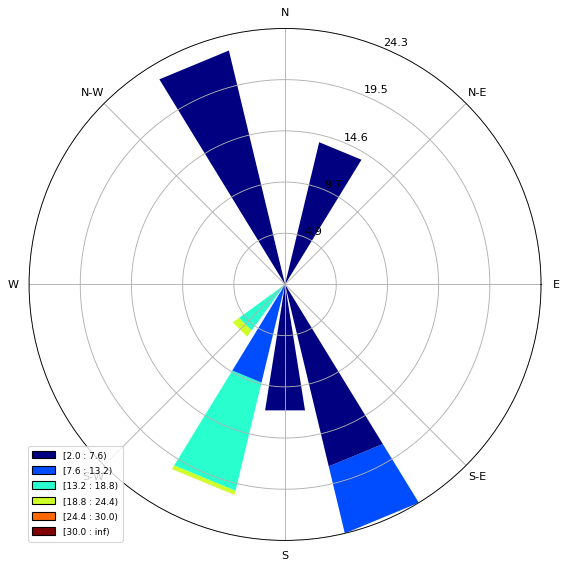

In [9]:
ax = WindroseAxes.from_ax()
ax.bar(wd_clean, ws_clean, normed=True, nsector=16)
ax.set_legend()
plt.show()

In [10]:
ax.bar(wd_clean, ws_clean, normed=True, nsector=16)
table = ax._info['table']
wd_freq = np.sum(table, axis=0)

<BarContainer object of 16 artists>

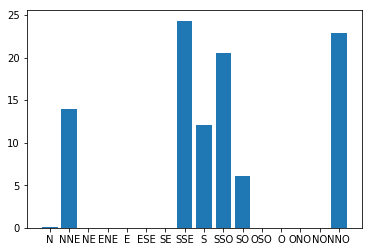

In [11]:
direction = ax._info['dir']
xlabels = ('N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSO','SO','OSO','O','ONO','NO','NNO')
xticks=range(16)
plt.bar(range(16), wd_freq, align='center', tick_label=xlabels)